# Synthesize a Table (Gaussian Coupla)

In this notebook, we'll use the SDV to create synthetic data for a single table and evaluate it. The SDV uses machine learning to learn patterns from real data and emulates them when creating synthetic data.

We'll use the **Gaussian Copula** algorithm to do this. Gaussian Copula is a fast, customizable and transparent way to synthesize data.

In [ ]:
!pip install urllib3==1.26.4

# 0. Installation

Install the SDV library.

<font color="maroon"><i>Note: After installation, you'll be prompted to restart the runtime. Click the the button that appears to continue.</i></font>

In [ ]:
%pip install sdv==1.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.1/114.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files

# Optional: You can skip this step if you are running the code on your own
# machine
uploaded = files.upload()

Saving activemq-5.0.0.csv to activemq-5.0.0.csv


In [ ]:
from sdv.datasets.local import load_csvs
from sdv.datasets.demo import download_demo

# This is the default folder name that the GOogle Colab notebook uses.
# Change this if you have your own folder with CSV files.
FOLDER_NAME = 'content/'

try:
  datasets = load_csvs(folder_name='/content/')
except ValueError:
  print('You have not uploaded any csv files. Using some demo data instead.')
  datasets, _ = download_demo(
    modality='single_table',
    dataset_name='train_3_CM1'
  )

In [ ]:
datasets.keys()

dict_keys(['activemq-5.0.0'])

In [ ]:
hotels_table = datasets['activemq-5.0.0']

In [ ]:
hotels_table.head()

,CountDeclMethodPrivate numeric,AvgLineCode numeric,CountLine numeric,MaxCyclomatic numeric,CountDeclMethodDefault numeric,AvgEssential numeric,CountDeclClassVariable numeric,SumCyclomaticStrict numeric,AvgCyclomatic numeric,AvgLine numeric,...,DDEV numeric,Added_lines numeric,Del_lines numeric,OWN_LINE numeric,OWN_COMMIT numeric,MINOR_COMMIT numeric,MINOR_LINE numeric,MAJOR_COMMIT numeric,MAJOR_LINE numeric,defect
0,0,10,171,5,0,2,0,18,2,18,...,1,32,18,1.00000,1.0,0,1,1,0,0
1,0,8,123,5,0,1,1,15,3,17,...,2,30,28,0.98374,0.5,0,1,2,1,0
2,0,7,136,5,0,1,1,16,2,13,...,1,8,8,1.00000,1.0,0,1,1,0,0
3,0,29,241,17,0,4,5,29,9,53,...,1,76,76,1.00000,1.0,0,1,1,0,0
4,0,24,212,17,0,3,5,26,8,44,...,1,76,76,1.00000,1.0,0,1,1,0,0


In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [ ]:
metadata.detect_from_dataframe(

    data=hotels_table
)

In [ ]:
metadata

{
    "columns": {
        "CountDeclMethodPrivate numeric": {
            "sdtype": "numerical"
        },
        "AvgLineCode numeric": {
            "sdtype": "numerical"
        },
        "CountLine numeric": {
            "sdtype": "numerical"
        },
        "MaxCyclomatic numeric": {
            "sdtype": "numerical"
        },
        "CountDeclMethodDefault numeric": {
            "sdtype": "numerical"
        },
        "AvgEssential numeric": {
            "sdtype": "numerical"
        },
        "CountDeclClassVariable numeric": {
            "sdtype": "numerical"
        },
        "SumCyclomaticStrict numeric": {
            "sdtype": "numerical"
        },
        "AvgCyclomatic numeric": {
            "sdtype": "numerical"
        },
        "AvgLine numeric": {
            "sdtype": "numerical"
        },
        "CountDeclClassMethod numeric": {
            "sdtype": "numerical"
        },
        "AvgLineComment numeric": {
            "sdtype": "numerical"
    

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(hotels_table)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


ContextualVersionConflict: ignored

In [ ]:
from sdv.sampling import Condition
c = Condition(
    num_rows=2000,
    column_values={'defect': 1}
)

c2 = Condition(
    num_rows=2000,
    column_values={'defect': 0}
)

In [ ]:
synthetic_data = synthesizer.sample_from_conditions(
    conditions=[c, c2],
    output_file_path='CGAN-PDE.csv'
)

Sampling conditions:   0%|          | 0/4000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:889: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group, dataframe in grouped_conditions:
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:927: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for transformed_group, transformed_dataframe in transformed_groups:
Sampling conditions:  50%|█████     | 2000/4000 [00:01<00:01, 1340.09it/s]/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:927: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a

In [ ]:
synthesizer.save('my_synthesizer.pkl')

synthesizer = GaussianCopulaSynthesizer.load('my_synthesizer.pkl')

# 3. Gaussian Copula Customization

A key benefit of using the Gaussian Copula is **customization and transparency**. This synthesizer estimates the shape of every column using a 1D distribution. We can set these shapes ourselves.

In [ ]:
custom_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    default_distribution='truncnorm',
    numerical_distributions={
        'checkin_date': 'uniform',
        'checkout_date': 'uniform',
        'room_rate': 'gaussian_kde'
    }
)

custom_synthesizer.fit(real_data)

After training, we can inspect the distributions. In this case, the synthesizer returns the parameter it learned using the truncnorm distribution.

<font color=navy><i>More information about truncnorm distribution is available in the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html).</i></font>

In [ ]:
learned_distributions = custom_synthesizer.get_learned_distributions()
learned_distributions['has_rewards']

{'distribution': 'truncnorm',
 'learned_parameters': {'a': -0.32512111259021126,
  'b': 2.6275343416277477,
  'loc': 0.22104071132962436,
  'scale': 0.6770328236255196}}

By setting these distributions strategically, you can make tradeoffs in the quality of your synthetic data.

In [ ]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

Creating report: 100%|██████████| 4/4 [00:00<00:00, 27.18it/s]



Overall Quality Score: 89.65%

Properties:
Column Shapes: 89.85%
Column Pair Trends: 89.45%


And we can verify this using the visualization functions.

In [ ]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data_customized,
    column_name='room_rate',
    metadata=metadata
)

fig.show()

# 4. Conditional Sampling
Another benefit of using the Gaussian Copula is the ability to **efficiently sample conditions**. This allows us to simulate hypothetical scenarios.

Let's start by creating a scenario where every hotel guest is staying in a `SUITE` (half with rewards and half without).


In [ ]:
from sdv.sampling import Condition

suite_guests_with_rewards = Condition(
    num_rows=250,
    column_values={'room_type': 'SUITE', 'has_rewards': True}
)

suite_guests_without_rewards = Condition(
    num_rows=250,
    column_values={'room_type': 'SUITE', 'has_rewards': False}
)

Now we can simulate this scenario efficiently using our trained synthesizer.

In [ ]:
simulated_synthetic_data = custom_synthesizer.sample_from_conditions(conditions=[
  suite_guests_with_rewards,
  suite_guests_without_rewards
])

Sampling conditions: 100%|██████████| 500/500 [00:00<00:00, 567.11it/s]


We can verify this by plotting the data.

In [ ]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=simulated_synthetic_data,
    column_name='room_type',
    metadata=metadata
)

fig.update_layout(
    title='Using synthetic data to simulate room_type scenario'
)

fig.show()

# 5. What's Next?

For more information about the Gaussian Copula Synthesizer, visit the **[documentation](https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/gaussiancopulasynthesizer)**.

**Need more help?** [Browse all tutorials](https://docs.sdv.dev/sdv/demos).


---

# About

The [Synthetic Data Vault Project](https://github.com/sdv-dev/SDV) was first created at MIT's Data to AI Lab in 2016. After 4 years of research and traction with enterprise, we created [DataCebo](https://datacebo.com/) in 2020 with the goal of growing the project. Today, DataCebo is the proud developer of SDV, the largest ecosystem for tabular synthetic data generation & evaluation.




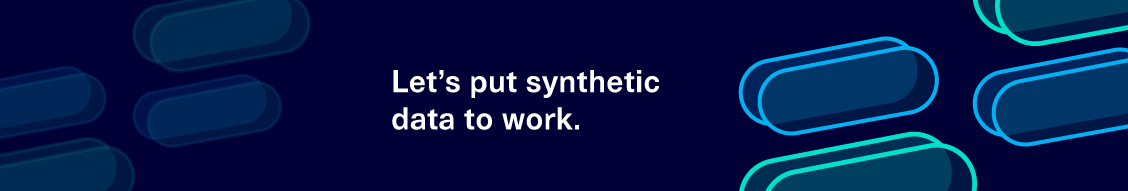